In [1]:
import numpy as np
from typing import List, Tuple
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import os
import seaborn as sns
sns.set(style="whitegrid")

img_dir = 'images'

In [2]:
data_path = '/home/tjy/repos/red-bag-data/all-csv/'

data_files = []
filenames = os.listdir(data_path)
for f in filenames:
    if '.csv' in f:
        data_files.append(os.path.join(data_path, f))

dfs: List[pd.DataFrame] = [pd.read_csv(f) for f in data_files]
dfs[0]

,order,value
0,0,1.23
1,1,6.29
2,2,12.43
3,3,4.13
4,4,1.10
5,5,0.81
6,6,4.73
7,7,10.97
8,8,12.90
9,9,11.41


In [3]:
data_df = []

for i in range(len(dfs)):
    df = dfs[i].values
    df = np.hstack([df, np.ones((10, 1)) * i])
    data_df.append(df)

data_df = np.vstack(data_df)
data_df = pd.DataFrame(data_df, columns=['order', 'money', 'trial'])
data_df.to_csv('data_df.csv')

In [4]:
n_trials = len(dfs)
data_dict = {'order': [i for i in range(10)]}

for i in range(n_trials):
    data_dict['trial_{}'.format(i)] = dfs[i]['value'].tolist()
data = pd.DataFrame(data_dict)
data.set_index('order', inplace=True)
np.savetxt('trials.csv', data.values)
# data

# histogram

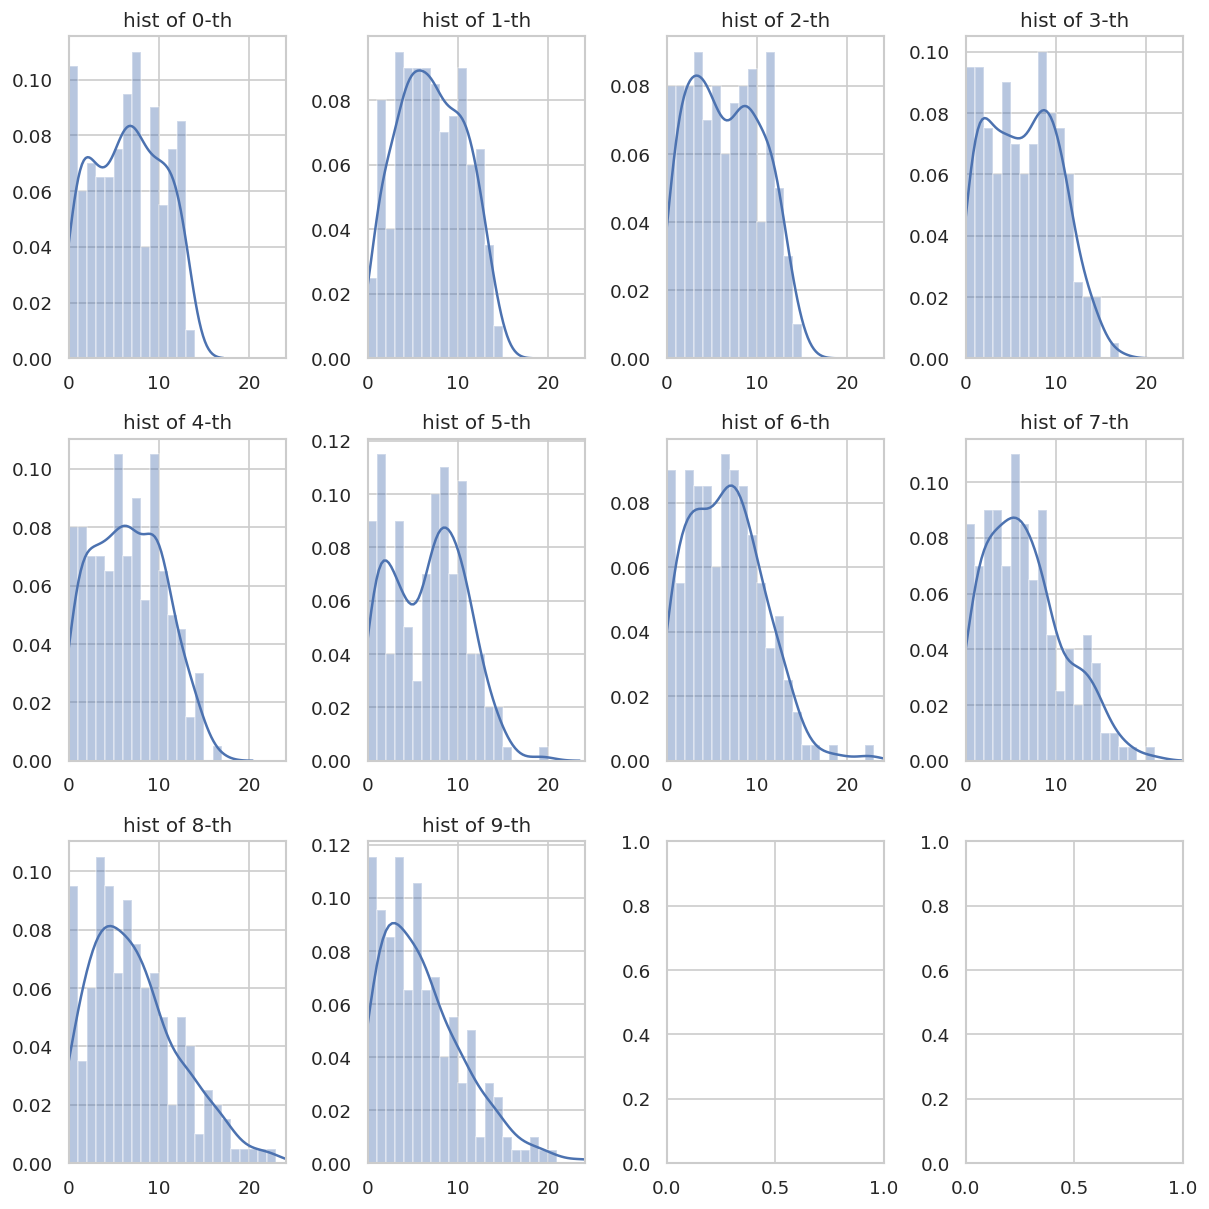

In [5]:
def plot_hist_for_players(data1, bin_size: float = 1.0):
    fig, axs = plt.subplots(3, 4)
    fig.set_size_inches(10.24, 10.24)
    axs = axs.flat
    xlim = np.max(data1.money)
    bins = np.arange(0.0, xlim + 0.1, step=bin_size)
    for i in range(10):
        _data1 = data1[data1.order == i].money.values
        sns.distplot(_data1, bins=bins, label="true data", ax=axs[i])
        axs[i].set_title('hist of {}-th'.format(i))
        axs[i].set_xlim([0, xlim])
    # axs[0].legend()
    fig.tight_layout()
    plt.savefig(os.path.join(img_dir, "distribution-true.png"))
    plt.show()

plot_hist_for_players(data_df)

# Data profile

In [14]:
pd.DataFrame(data.T).describe()

order,0,1,2,3,4,5,6,7,8,9
count,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.524450,7.014650,6.517550,6.357850,6.5826,6.618050,6.516000,6.564750,7.223750,6.080350
std,3.823247,3.621468,3.894147,3.932249,3.9002,4.075096,4.089039,4.345045,4.875636,4.690813
min,0.660000,0.620000,0.550000,0.540000,0.5200,0.500000,0.420000,0.360000,0.190000,0.050000
25%,3.212500,4.232500,3.210000,2.942500,3.2550,3.047500,3.187500,3.275000,3.470000,2.350000
50%,6.510000,6.860000,6.175000,6.220000,6.5250,7.170000,6.465000,5.935000,6.460000,5.455000
75%,9.662500,10.137500,9.615000,9.442500,9.6875,9.802500,9.367500,8.975000,10.062500,8.742500
max,13.170000,14.490000,14.760000,16.630000,16.3300,19.270000,22.400000,20.580000,22.370000,24.100000


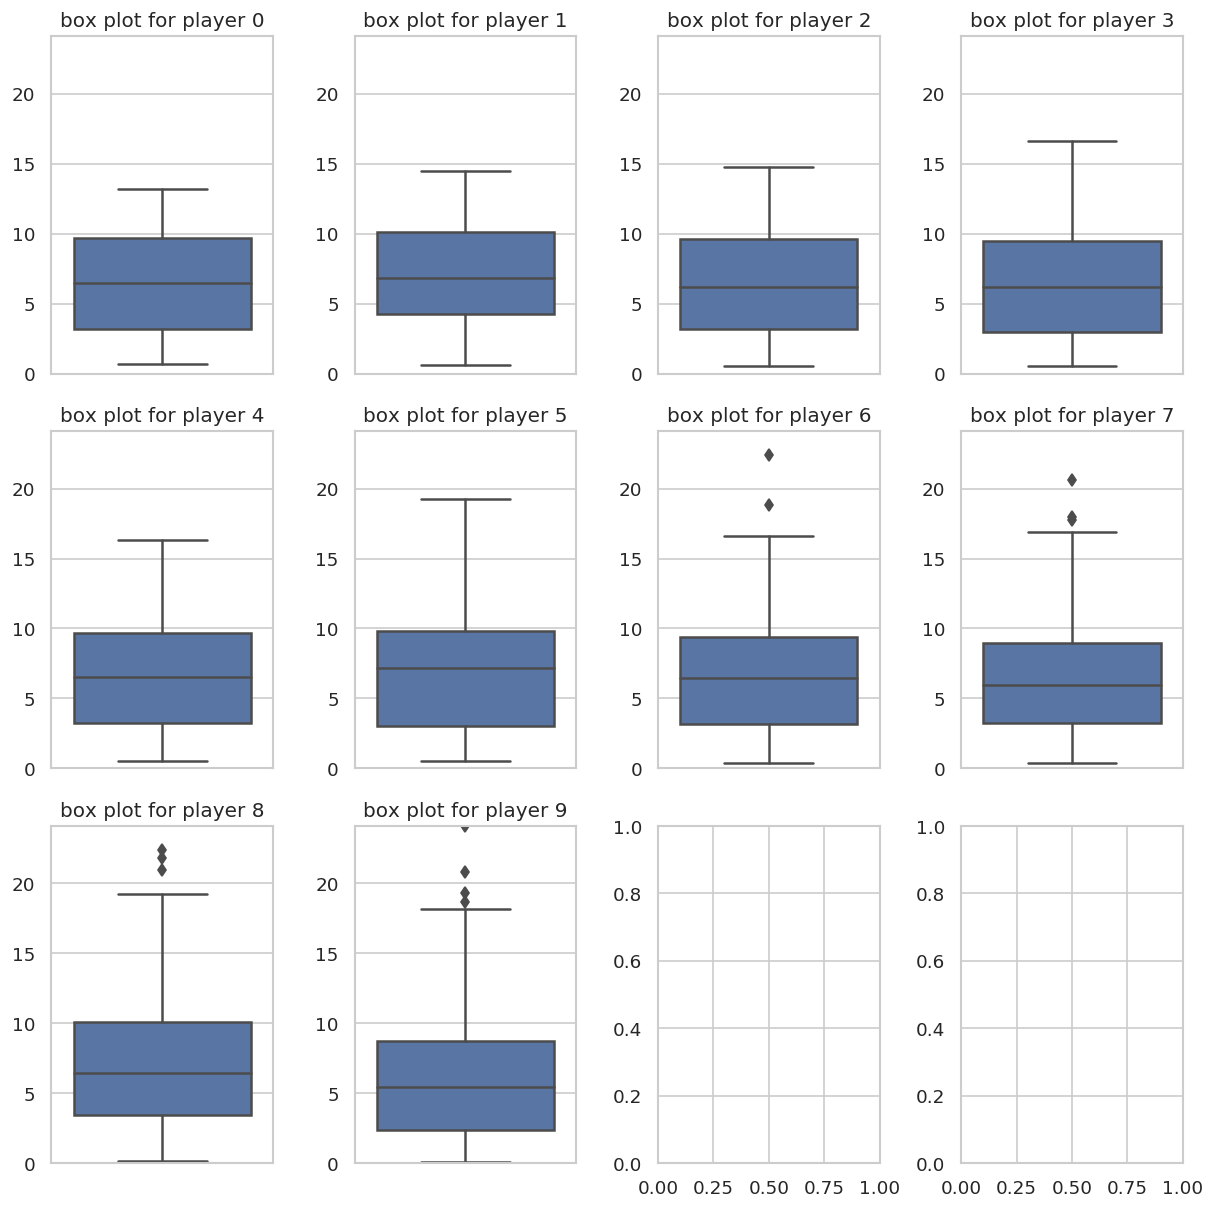

In [7]:
def boxplot(data: pd.DataFrame, plot_name):
    fig, axs = plt.subplots(3, 4)
    fig.set_size_inches(10.24, 10.24)
    axs = axs.flat
    ylim = np.max(data.values)
    for i in range(10):
        sns.boxplot(data.values[i,], ax=axs[i], orient='v')
        title = 'box plot for player {}'.format(i)
        axs[i].set_title(title)
        axs[i].set_ylim([0, ylim])
    fig.tight_layout()
    plt.savefig(os.path.join(img_dir, 'box-plot-{}.png'.format(plot_name)))
    plt.show()

boxplot(data, 'true-data')

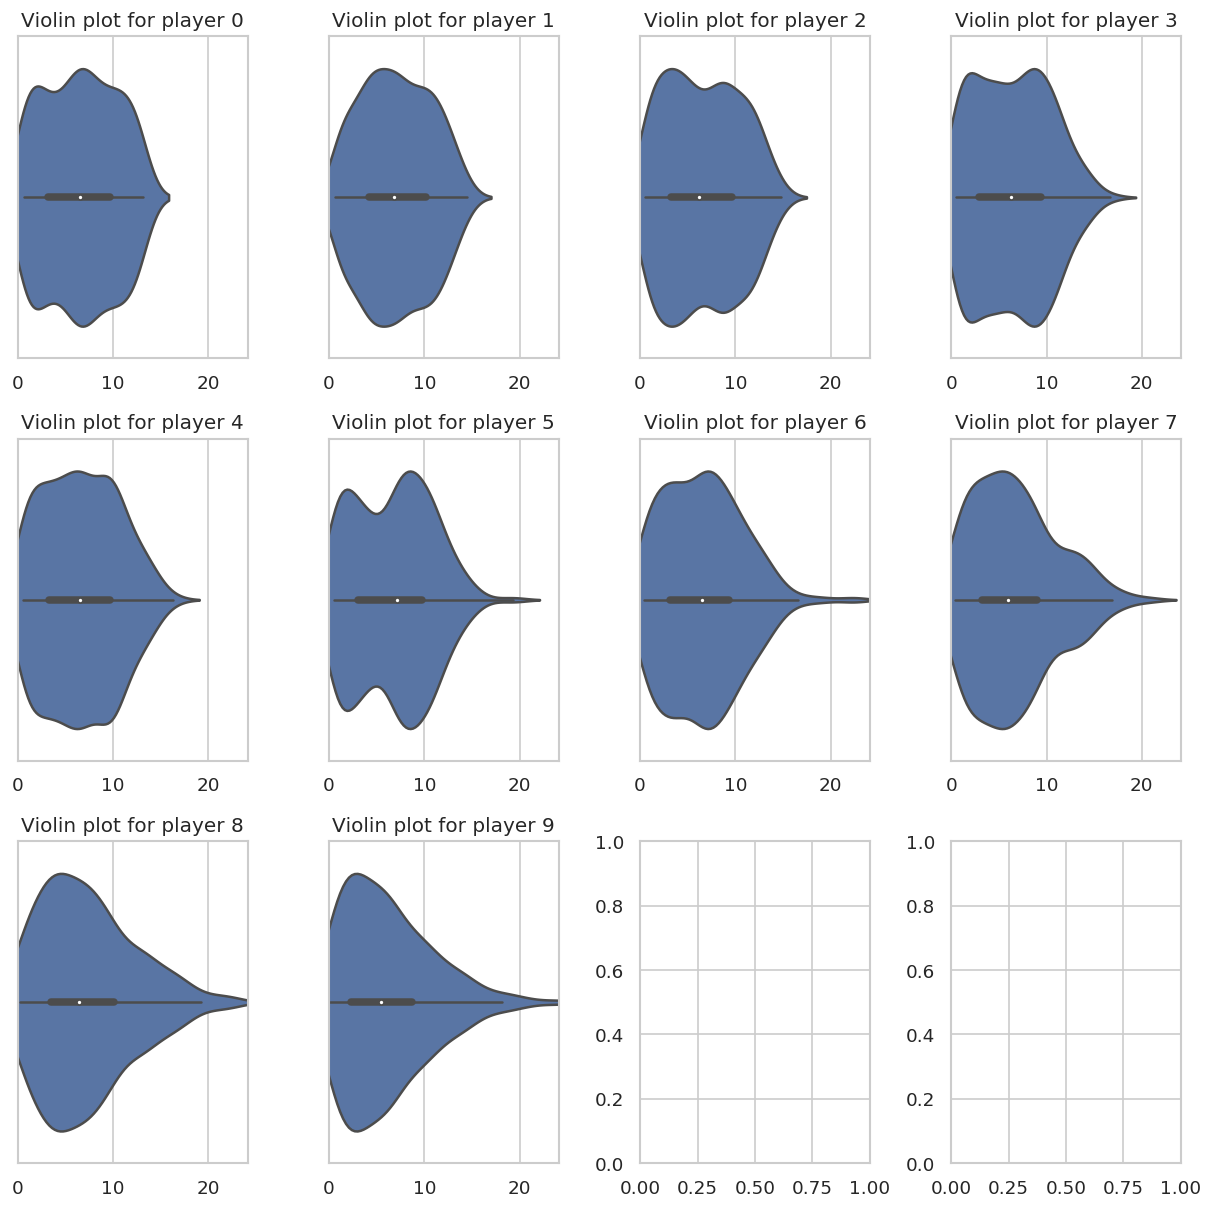

In [8]:
def violinplot(data: pd.DataFrame, plot_name):
    fig, axs = plt.subplots(3, 4)
    fig.set_size_inches(10.24, 10.24)
    axs = axs.flat
    lim = np.max(data.values)
    for i in range(10):
        sns.violinplot(data.values[i,], ax=axs[i])
        title = 'Violin plot for player {}'.format(i)
        axs[i].set_title(title)
        axs[i].set_xlim([0, lim])
    fig.tight_layout()
    plt.savefig(os.path.join(img_dir, 'violin-plot-{}.png'.format(plot_name)))
    plt.show()

violinplot(data, 'true-data')

# Luckiest Players & Least Lucky Players

In [9]:
def plot_lucky_n_unlucky_players(data_lucky: pd.DataFrame, data_unlucky: pd.DataFrame, bar_width: float = 0.35):
    labels = [str(i) for i in range(10)]
    lucky = data_lucky.values.flatten().tolist()
    unlucky = data_unlucky.values.flatten().tolist()
    fig, ax = plt.subplots()
    ax.bar(labels, lucky, width=bar_width, label='Lucky')
    ax.bar(labels, unlucky, width=bar_width, bottom=lucky,
           label='Unlucky')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Player order')
    ax.set_title('Count of luckiest and unluckiest players')
    ax.legend()
    plt.show()

# plot_lucky_n_unlucky_players(luckiest_player, unluckiest_player)

In [15]:
def remain_average(data: pd.DataFrame, money=66.0, n_trials=200):
    data = data.values
    data_cumsum = np.cumsum(data, axis=0)
    data_cumsum = np.vstack([np.zeros((1, n_trials)), data_cumsum[:-1]])
    remaining = money - data_cumsum
    remain_n_players = np.arange(1, 11)[::-1].reshape(10, 1)
    remain_n_players = np.repeat(remain_n_players, n_trials, axis=1)
    remaining /= remain_n_players # no need for the last player
    k = data / remaining 
    return k

k = remain_average(data)
k_df = pd.DataFrame(k[:-1].flatten())
k_df.describe()

,0
count,1800.000000
mean,1.008518
std,0.567789
min,0.097968
25%,0.524374
50%,1.032778
75%,1.486377
max,1.997090


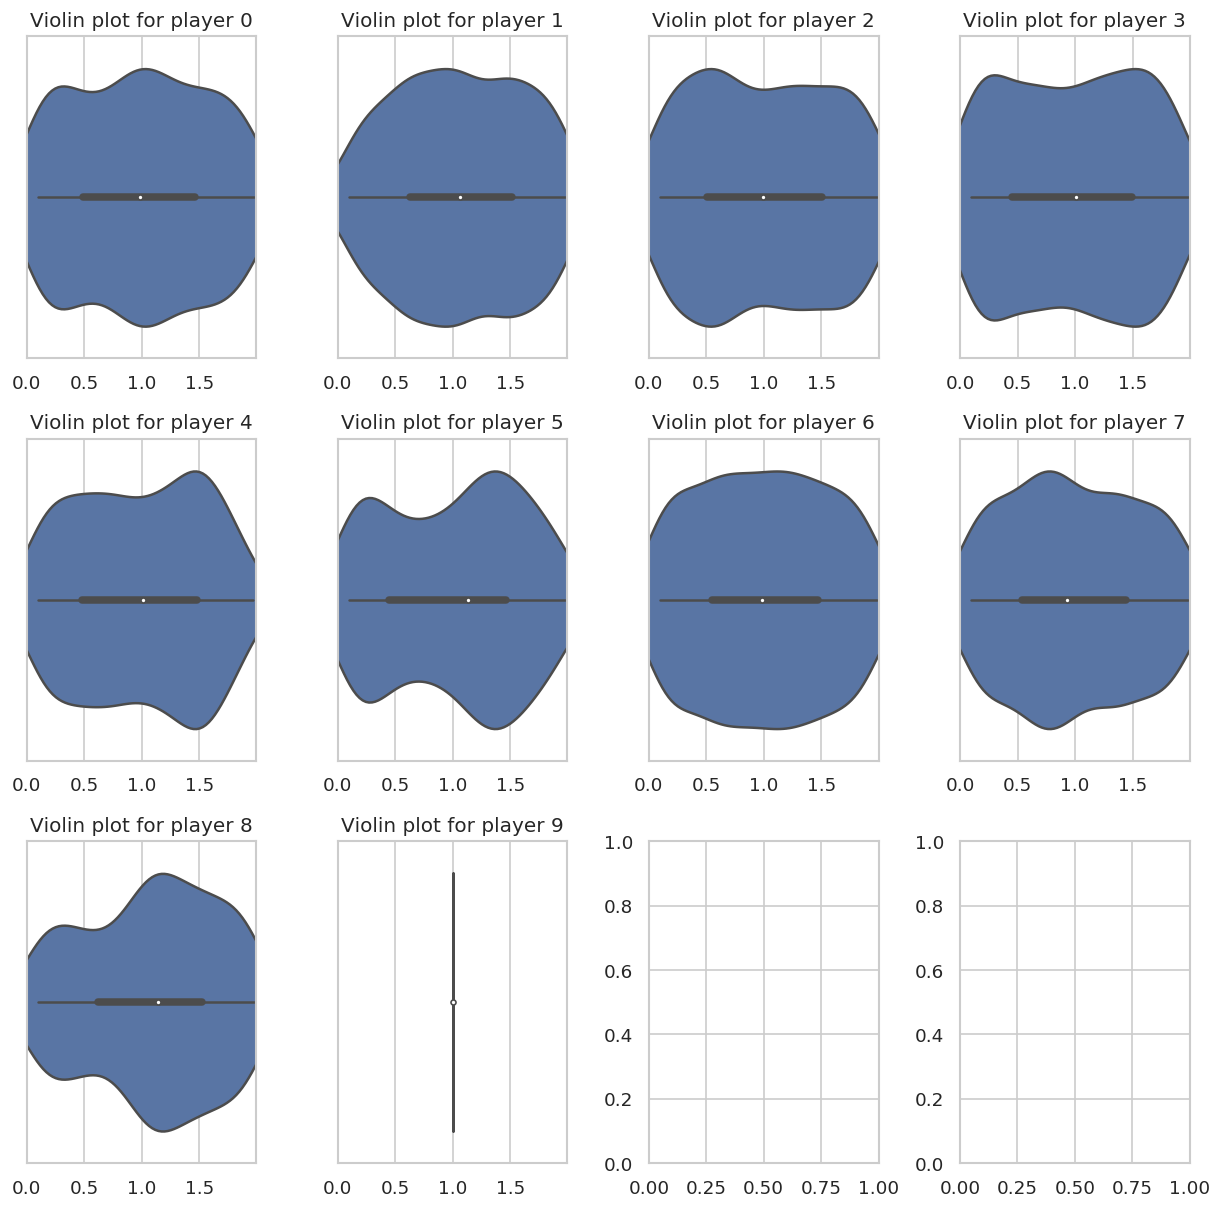

In [11]:
k_data = pd.DataFrame(k)
violinplot(k_data, 'k')

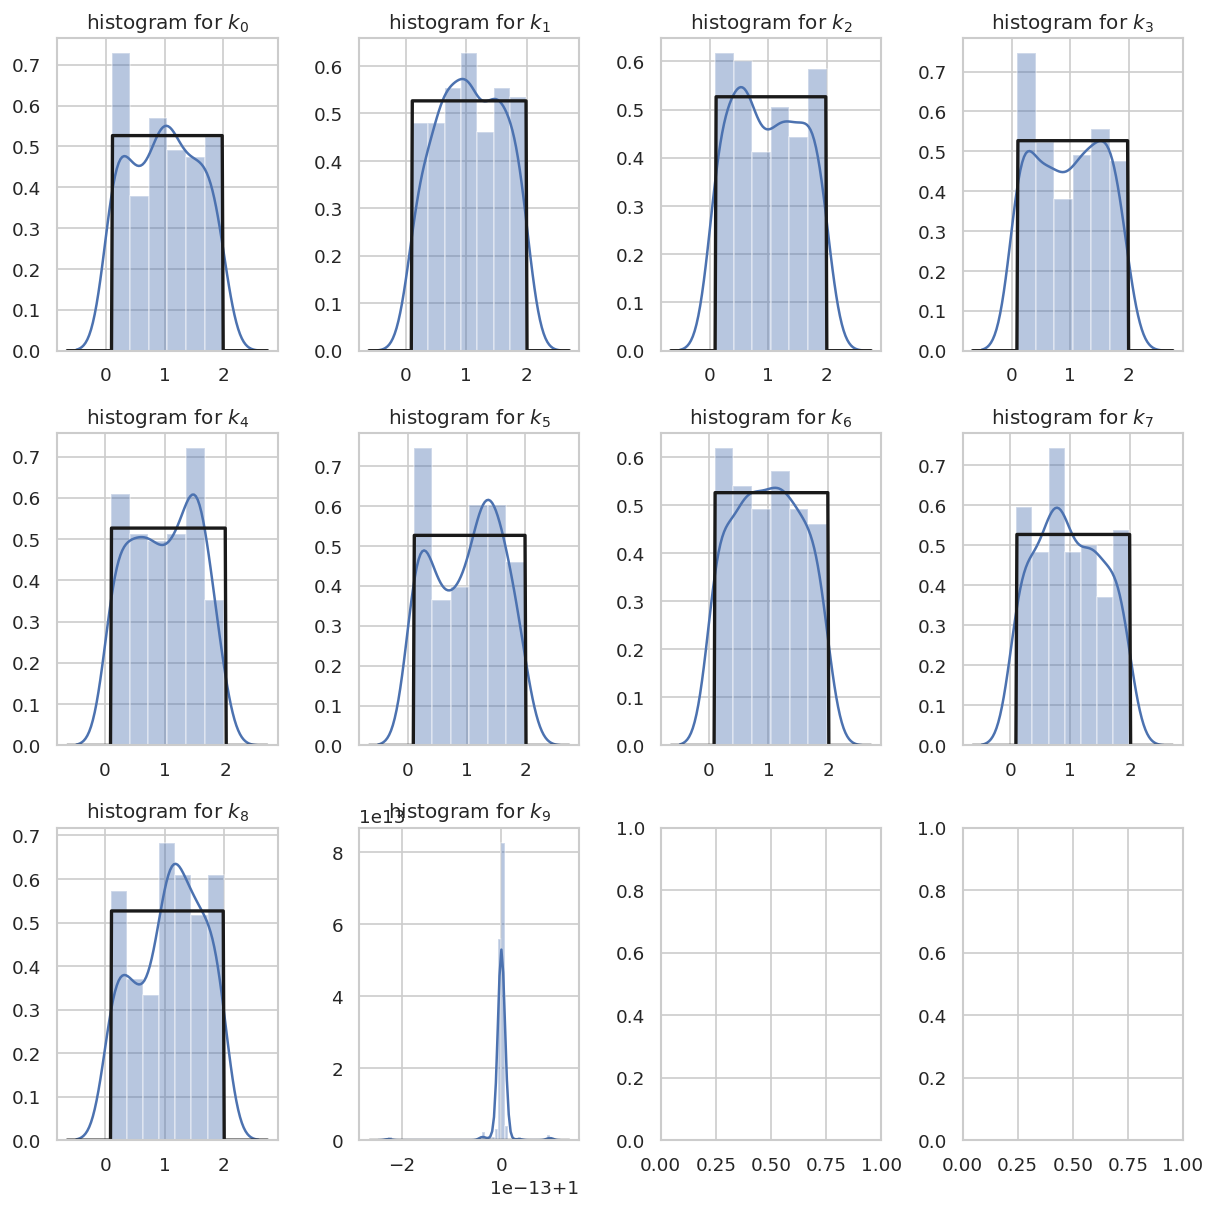

(0.09796806966618292, 1.899122282554338)

In [12]:
from scipy.stats import uniform

def plot_dists_fit(data: np.ndarray, dist=uniform):
    fig, axs = plt.subplots(3, 4)
    fig.set_size_inches(10.24, 10.24)
    axs = axs.flat
    d = dist.fit(data.flatten())
    for i in range(10):
        sns.distplot(data[i,], ax=axs[i])
        title = 'histogram for $k_{}$'.format(i)
        axs[i].set_title(title)
        # plot the PDF
        xmin, xmax = axs[i].get_xlim()
        x = np.linspace(xmin, xmax, data.shape[1])
        p = dist.pdf(x, *d)
        axs[i].plot(x, p, 'k', linewidth=2)
    fig.tight_layout()
    plt.savefig(os.path.join(img_dir, 'k-histogram.png'))
    plt.show()
    return d

plot_dists_fit(k)